# Problem 2
Solution set for CS 155 Set 5, 2019/2020

Authors: Fabian Boemer, Sid Murching, Suraj Nair, Alex Cui

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2C:
Fill in these functions to train your SVD

In [2]:
import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))

## 2D:
Run the cell below to get your graphs

Factorizing with  943  users,  1682  movies.
Epoch 1, E_in (regularized MSE): 0.591789931868551
Epoch 2, E_in (regularized MSE): 0.4405120817522329
Epoch 3, E_in (regularized MSE): 0.4021047655986687
Epoch 4, E_in (regularized MSE): 0.37912083732606955
Epoch 5, E_in (regularized MSE): 0.362108589992892
Epoch 6, E_in (regularized MSE): 0.34849798361557216
Epoch 7, E_in (regularized MSE): 0.3408575072005874
Epoch 8, E_in (regularized MSE): 0.3302895857283817
Epoch 9, E_in (regularized MSE): 0.3242886975041919
Epoch 10, E_in (regularized MSE): 0.32121663389509864
Epoch 11, E_in (regularized MSE): 0.31208603841512544
Epoch 12, E_in (regularized MSE): 0.31151179281677893
Epoch 1, E_in (regularized MSE): 0.5791995012993228
Epoch 2, E_in (regularized MSE): 0.4098933755505582
Epoch 3, E_in (regularized MSE): 0.3529024555894659
Epoch 4, E_in (regularized MSE): 0.32053822951558136
Epoch 5, E_in (regularized MSE): 0.29383964148706987
Epoch 6, E_in (regularized MSE): 0.2767305552139633
Epoch 7, E_

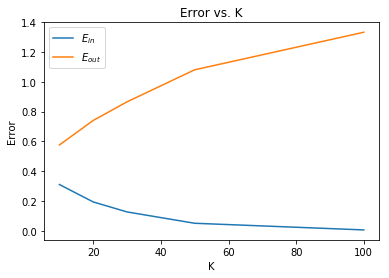

In [3]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []

# Use to compute Ein and Eout
for K in Ks:
    U,V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test))

plt.plot(Ks, E_in, label='$E_{in}$')
plt.plot(Ks, E_out, label='$E_{out}$')
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

## 2E:
Run the cell below to get your graphs

Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
Epoch 1, E_in (regularized MSE): 0.5894147233843371
Epoch 2, E_in (regularized MSE): 0.43829458857749276
Epoch 3, E_in (regularized MSE): 0.3957363185933046
Epoch 4, E_in (regularized MSE): 0.37209137684616966
Epoch 5, E_in (regularized MSE): 0.3556423689693124
Epoch 6, E_in (regularized MSE): 0.3442058277949161
Epoch 7, E_in (regularized MSE): 0.332093335951516
Epoch 8, E_in (regularized MSE): 0.32598208961770614
Epoch 9, E_in (regularized MSE): 0.3189674200164006
Epoch 10, E_in (regularized MSE): 0.3165032033408233
Epoch 11, E_in (regularized MSE): 0.31272230413474505
Epoch 12, E_in (regularized MSE): 0.30802511494117507
Epoch 13, E_in (regularized MSE): 0.30608313963000566
Epoch 14, E_in (regularized MSE): 0.302548655742631
Epoch 15, E_in (regularized MSE): 0.3010505666565259
Epoch 16, E_in (regularized MSE): 0.3001640048407719
Epoch 17, E_in (regularized MSE): 0.299724764056651
Training model with M = 943, N = 

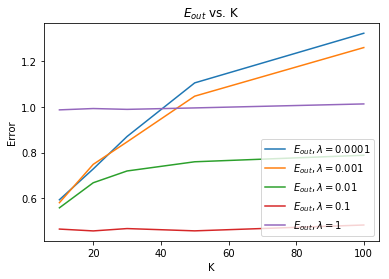

In [3]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50,100]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_ein.png')
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_eout.png')